In [16]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
han = Hannanum()

In [11]:
data = pd.read_excel('..\\data\\clustering_data.xlsx')
data

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n최근 한 온라인커뮤니티에서는...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n5일 오..."


In [12]:
docs=[]
for i in data['기사내용']:
    docs.append(han.nouns(i))
docs

[['유한양행',
  '얀센',
  '바이오테크(Janssen',
  '표적',
  '항암',
  '치료제',
  '기술이전',
  '계약',
  '체결',
  '5일',
  '공시',
  '기술수출금액',
  '12억5500만달러(한화',
  '약',
  '1조3416억원',
  '계약금',
  '5000만달러',
  '개발',
  '허가',
  '매출',
  '단계별',
  '마일스톤',
  '12억500만달러',
  '수령',
  '예정',
  '경상기술료',
  '순매출액',
  '책정',
  '유한양행',
  '관계자',
  '기술이전',
  '계약',
  '수익',
  '식',
  '임상시험',
  '허가',
  '등',
  '성공여부',
  '수',
  '미실현',
  '가능성'],
 ['유한양행',
  '1조4000억원',
  '규모',
  '기술이전',
  '계약',
  '체결',
  '소식',
  '가격제한폭',
  '5일',
  '오전',
  '9시',
  '3분',
  '유한양행',
  '전날',
  '5만3000원(29.',
  '78',
  '23만1000원',
  '거래',
  '사흘',
  '연속',
  '강세',
  '유한양행',
  '글로벌',
  '제약사',
  '존슨앤존슨(J&J)',
  '자회사',
  '얀센',
  '바이오테크(Janssen',
  '저해제',
  '‘레이저티닙’(프로젝트명',
  'YH25448)',
  '기술수출',
  '계약',
  '체결',
  '이날',
  '계약규모',
  '약',
  '1조4000억원(12억5500만달러)',
  '반환',
  '의무',
  '계약금',
  '560억원(5000',
  '이번',
  '계약',
  '얀센',
  '전세계',
  '레이저티닙',
  '개발',
  '제조',
  '상업화',
  '독점적',
  '권리',
  '국내',
  '개발',
  '상업화',
  '권리',
  '유한양행',
  '유',
  '유한양행',
  '얀센',
  '바이오텍',
  '내

In [13]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [14]:
docs

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성',
 '유한양행 1조4000억원 규모 기술이전 계약 체결 소식 가격제한폭 5일 오전 9시 3분 유한양행 전날 5만3000원(29. 78 23만1000원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨앤존슨(J&J) 자회사 얀센 바이오테크(Janssen 저해제 ‘레이저티닙’(프로젝트명 YH25448) 기술수출 계약 체결 이날 계약규모 약 1조4000억원(12억5500만달러) 반환 의무 계약금 560억원(5000 이번 계약 얀센 전세계 레이저티닙 개발 제조 상업화 독점적 권리 국내 개발 상업화 권리 유한양행 유 유한양행 얀센 바이오텍 내년 레이저티닙 단일요법 병용요법 글로벌 임상시험 공동 진행 예정 유한양행 개발 허가 상업화 성공 단계별 마일스톤 기술료 12억500 달러(약 1조3500억원 수 임상시험 허가 상업화 실패 경우 기술이전 계약 종료 경우 유한양행 얀센 측 지급 위약금',
 '유한양행 다국적 제약사 얀센 기술수출 소식 주가 5일 장 초반 상한가 유한양행 이날 오전 9시 5분 현재 유가증권시장 전 거래일 5만3000원(29. 78 23만1000원 거래 유한양행 얀센 바이오테크 상피세포 성장 자 수용체 표적 항암 치료제 기술 이전 계약 체결 이날 장 개장 전 공시 이번 계약금 5000 개발 상업화 단계별 기술료(마일스톤) 12억500 달러 기술수출 규모 12억5500 달러(약 1조4000억원 서근희 삼성증권 연구원 유한양행 이번 기술수출 계약 소식 한미약품 이후 기술 이전 계약 투자자들 갈증 해소 전망 "한미약품 사노피 기술 이전 계약 체결 이후 2번 계약 규모 말',
 '유한양행 얀센 바이오테크((Janssen 상피세포

In [18]:
vec = CountVectorizer()
x = vec.fit_transform(docs)
x

<15x581 sparse matrix of type '<class 'numpy.int64'>'
	with 913 stored elements in Compressed Sparse Row format>

In [19]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [20]:
df = pd.DataFrame(x.toarray(), columns=vec.get_feature_names())
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(15, 581)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df)
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [24]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

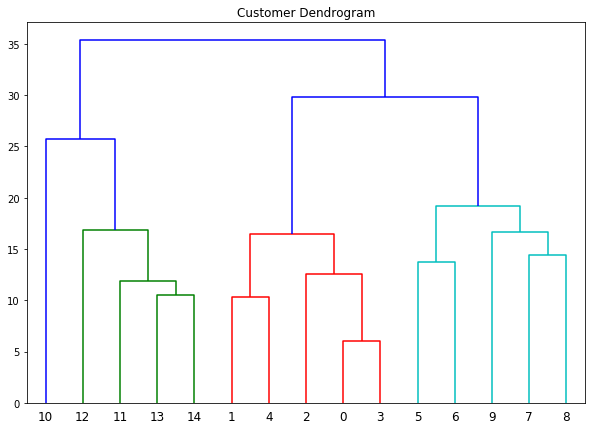

In [25]:
plt.figure(figsize=(10,7))
plt.title('Customer Dendrogram')
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [26]:
df.shape

(15, 581)

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [35]:
principalDf

,principal component 1,principal component 2
0,-2.245406,-4.167451
1,-3.613955,-9.898588
2,-2.932635,-7.159357
3,-2.142771,-3.757107
4,-3.397877,-8.904278
5,-3.456163,0.931164
6,-4.172640,2.527029
7,-6.418892,7.240862
8,-7.928538,10.011249
9,-7.161776,8.881848


In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(principalDf)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

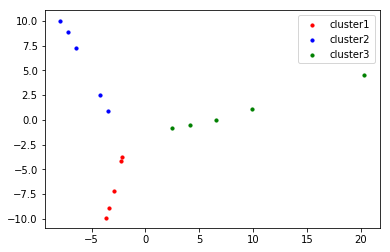

In [39]:
# x축 : first y출 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()